In [59]:
import glob 
import os
import matplotlib.pyplot as plt
import pims as pm
from pims import pipeline # To analyze one frame at each time
import trackpy as tp # To do the tracking
import numpy as np
import pandas as pd

# To convert to gray scale one by one each image of the video
@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# Preliminar tracking

In  this script, I will develop an algorith to track the particles. 

In [60]:
directory ="/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/"

filenames = [file for file in glob.glob(
    os.path.join(directory,('EXP4_2023_03_24_13_18_06.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP4_2023_03_24_13_18_06.avi']

## One frame analysis

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/with-interaction/21_24-04-2023_Preliminar-experiments/EXP4_2023_03_24_13_18_06.avi


Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f979435f830>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


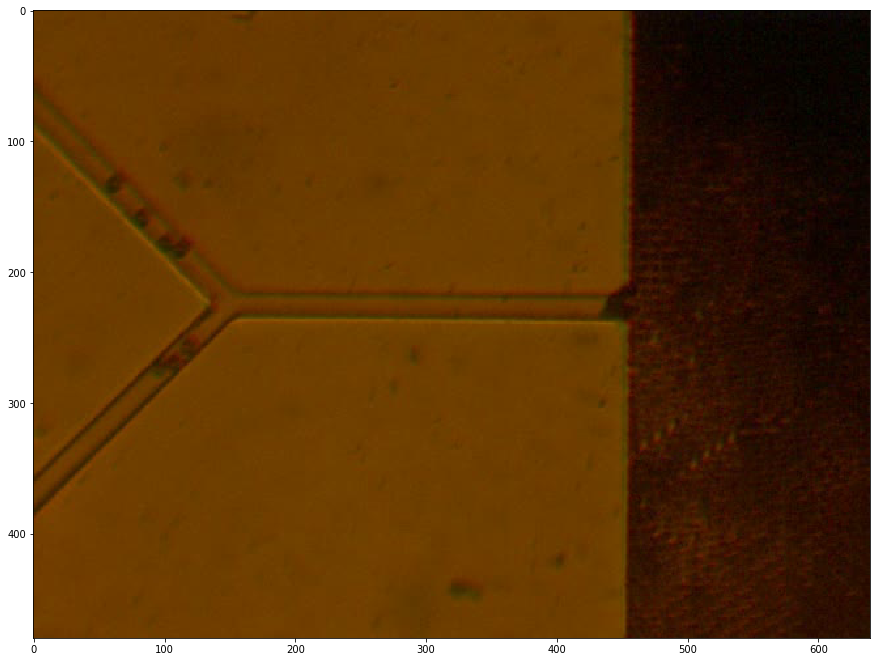

<Figure size 360x360 with 0 Axes>

In [61]:
fig, ax = plt.subplots(1,1,figsize=(15,15))

exp = 0
frame = 1000


plt.figure(figsize = (5,5))
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [62]:
# inverted = tp.preprocessing.invert_image(video[frame])
# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(inverted)

In [63]:
# video_inverted = tp.preprocessing.invert_image(video)



# img_filtered = tp.preprocessing.bandpass(video[0], lshort = 0.85, llong = 51)
# img_filtered

In [64]:
video = as_gray(video)

In [65]:
def mean_frame(video):
    
    frames = video[0]
    for i in range(1, len(video), 1):

        frames = frames + video[i]
        
    mean = frames/len(video)
    
    return mean

In [66]:
# This function 

def substraction(frame, mean):
    
    frame_sub = (mean.astype(np.int8)- video[frame].astype(np.int8))
    
    return frame_sub

In [67]:
mean = mean_frame(video)

Frame([[64.8057, 64.8057, 64.8057, ...,  6.9866,  7.7799,  8.7799],
       [64.8057, 64.8057, 64.8057, ...,  9.9866,  8.7799,  6.7799],
       [64.8057, 64.8057, 64.8057, ..., 12.1991,  9.277 ,  6.277 ],
       ...,
       [63.0124, 63.0124, 63.0124, ..., 20.2368, 20.2368, 20.2368],
       [62.3749, 62.3749, 62.3749, ..., 21.7397, 21.4551, 20.5272],
       [62.3749, 62.3749, 62.3749, ..., 21.7397, 21.4551, 21.4551]])
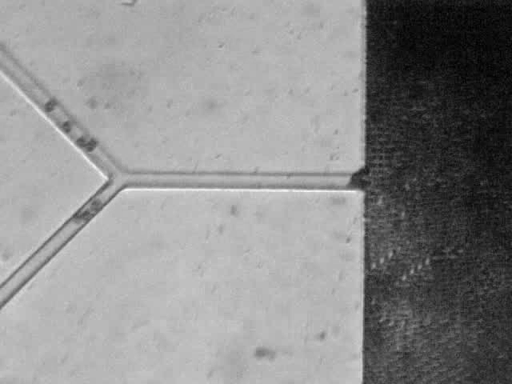

In [68]:
video[1000]

In [69]:
# sub.append(substraction(frame, 5191))

In [70]:
# img_filtered = tp.preprocessing.bandpass(inverted, lshort = 0.80, llong = 51, threshold=150/255, truncate=4)

# fig, ax = plt.subplots(1,1,figsize=(5,5))

# plt.figure(figsize = (5,5))

# ax.imshow(img_filtered)

Frame([[-2, -1,  1, ...,  0,  1,  5],
       [ 0,  0,  0, ...,  1,  1,  3],
       [ 2,  1, -1, ...,  0, -4, -3],
       ...,
       [ 0,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  0, ...,  1,  2,  2],
       [ 1,  1,  0, ..., -1,  1,  2]], dtype=int8)
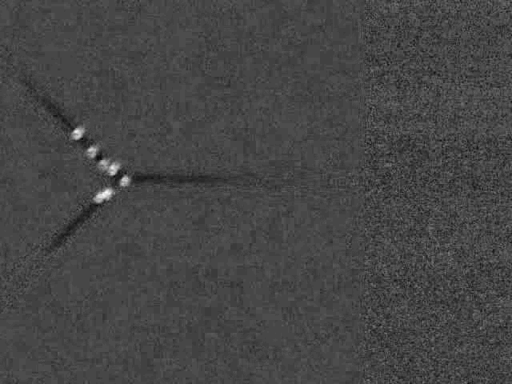

In [74]:
sub = substraction(700, mean)
sub

In [ ]:
hough circle

In [53]:
diameter = 14
radius = diameter/2
radius

diameter = 2*radius

i = 0    

#@pipeline 
def locate(filename):

     return tp.locate(filename,2*round(radius)+1, threshold = 0,separation = diameter/2,minmass = 300)
#     return tp.locate(filename,2*round(radius)+1, threshold = 5, noise_size = 5, separation = diameter/2, percentile = 20,
#                     characterize = False)


loc = locate(sub)
loc

y           x         mass      size       ecc     signal  \
528  212.423891  139.962647  1044.632545  4.437652  0.208530  15.581592   
534  221.596151  162.438616   858.052969  4.198272  0.158697  13.450776   
535  221.098893  186.392026   938.624449  4.084487  0.043580  16.913352   
542  223.275693  175.735930   653.095105  4.384390  0.023799   9.588672   
548  225.241872  201.266531   847.931593  3.824544  0.147225  14.516184   
549  222.494452  239.648336  1104.295393  4.080681  0.137060  15.847944   
550  226.262927  282.184451  1094.573545  3.990148  0.040603  16.380648   

     raw_mass        ep  frame  
528    2187.0  0.023568      0  
534    2347.0  0.022248      0  
535    3020.0  0.018006      0  
542    2820.0  0.019087      0  
548    2025.0  0.025075      0  
549    2480.0  0.021258      0  
550    2546.0  0.020799      0

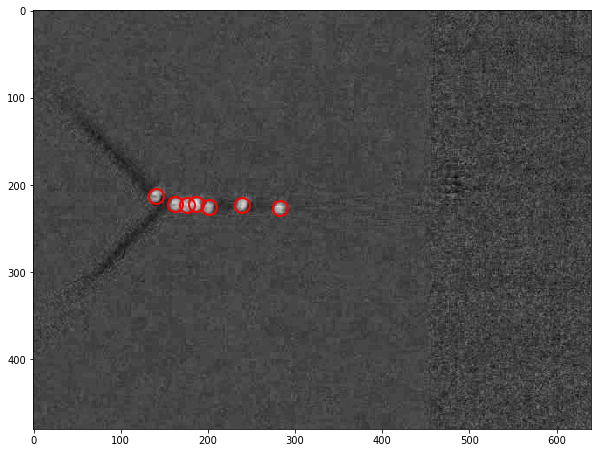

In [54]:
plt.figure(figsize=(10,10))
tp.annotate(loc, sub);

## Whole video

Until here the used method works fine. Outside the channel the tracking does not work perfectly, but inside the channel it works good. Then, I can use this parameters to do the tracking and after that filter only the ROI.

The problem with this method is that the function tp.preprocessing.bandpass() is not working for the whole video. 

<span style="color:red">I need to find the good parameters for descern two particles attached. </span>


In the following loop I apply all the filters and generate a dataframe with all the detected particles with the corresponding frame value. 

# Loop to analyze the whole video

In [165]:
%%time
diameter = 13
radius = diameter/2
radius

loc_df = []
for i in range(0,len(video), 2): # Analyze 1 frame each 30 frame

    sub = substraction(i, mean)

    loc = tp.locate(sub,2*round(radius)+1,  threshold = 0 ,separation = diameter/2,minmass =  150)
    
    loc['frame'] = i
    loc_df.append(loc.copy(deep = True))
    print(i)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

3500
3502
3504
3506
3508
3510
3512
3514
3516
3518
3520
3522
3524
3526
3528
3530
3532
3534
3536
3538
3540
3542
3544
3546
3548
3550
3552
3554
3556
3558
3560
3562
3564
3566
3568
3570
3572
3574
3576
3578
3580
3582
3584
3586
3588
3590
3592
3594
3596
3598
3600
3602
3604
3606
3608
3610
3612
3614
3616
3618
3620
3622
3624
3626
3628
3630
3632
3634
3636
3638
3640
3642
3644
3646
3648
3650
3652
3654
3656
3658
3660
3662
3664
3666
3668
3670
3672
3674
3676
3678
3680
3682
3684
3686
3688
3690
3692
3694
3696
3698
3700
3702
3704
3706
3708
3710
3712
3714
3716
3718
3720
3722
3724
3726
3728
3730
3732
3734
3736
3738
3740
3742
3744
3746
3748
3750
3752
3754
3756
3758
3760
3762
3764
3766
3768
3770
3772
3774
3776
3778
3780
3782
3784
3786
3788
3790
3792
3794
3796
3798
3800
3802
3804
3806
3808
3810
3812
3814
3816
3818
3820
3822
3824
3826
3828
3830
3832
3834
3836
3838
3840
3842
3844
3846
3848
3850
3852
3854
3856
3858
3860
3862
3864
3866
3868
3870
3872
3874
3876
3878
3880
3882
3884
3886
3888
3890
3892
3894
3896
3898


6784
6786
6788
6790
6792
6794
6796
6798
6800
6802
6804
6806
6808
6810
6812
6814
6816
6818
6820
6822
6824
6826
6828
6830
6832
6834
6836
6838
6840
6842
6844
6846
6848
6850
6852
6854
6856
6858
6860
6862
6864
6866
6868
6870
6872
6874
6876
6878
6880
6882
6884
6886
6888
6890
6892
6894
6896
6898
6900
6902
6904
6906
6908
6910
6912
6914
6916
6918
6920
6922
6924
6926
6928
6930
6932
6934
6936
6938
6940
6942
6944
6946
6948
6950
6952
6954
6956
6958
6960
6962
6964
6966
6968
6970
6972
6974
6976
6978
6980
6982
6984
6986
6988
6990
6992
6994
6996
6998
7000
7002
7004
7006
7008
7010
7012
7014
7016
7018
7020
7022
7024
7026
7028
7030
7032
7034
7036
7038
7040
7042
7044
7046
7048
7050
7052
7054
7056
7058
7060
7062
7064
7066
7068
7070
7072
7074
7076
7078
7080
7082
7084
7086
7088
7090
7092
7094
7096
7098
7100
7102
7104
7106
7108
7110
7112
7114
7116
7118
7120
7122
7124
7126
7128
7130
7132
7134
7136
7138
7140
7142
7144
7146
7148
7150
7152
7154
7156
7158
7160
7162
7164
7166
7168
7170
7172
7174
7176
7178
7180
7182


10058
10060
10062
10064
10066
10068
10070
10072
10074
10076
10078
10080
10082
10084
10086
10088
10090
10092
10094
10096
10098
10100
10102
10104
10106
10108
10110
10112
10114
10116
10118
10120
10122
10124
10126
10128
10130
10132
10134
10136
10138
10140
10142
10144
10146
10148
10150
10152
10154
10156
10158
10160
10162
10164
10166
10168
10170
10172
10174
10176
10178
10180
10182
10184
10186
10188
10190
10192
10194
10196
10198
10200
10202
10204
10206
10208
10210
10212
10214
10216
10218
10220
10222
10224
10226
10228
10230
10232
10234
10236
10238
10240
10242
10244
10246
10248
10250
10252
10254
10256
10258
10260
10262
10264
10266
10268
10270
10272
10274
10276
10278
10280
10282
10284
10286
10288
10290
10292
10294
10296
10298
10300
10302
10304
10306
10308
10310
10312
10314
10316
10318
10320
10322
10324
10326
10328
10330
10332
10334
10336
10338
10340
10342
10344
10346
10348
10350
10352
10354
10356
10358
10360
10362
10364
10366
10368
10370
10372
10374
10376
10378
10380
10382
10384
10386
10388
1039

In [166]:
df = pd.concat(loc_df)

In [167]:
tracking = tp.link(df,10 , memory = 50, link_strategy ='recursive', neighbor_strategy= 'KDTree')

Frame 10554: 42 trajectories present.


In [168]:
tracking = tracking.set_index(["frame","particle"])

In [169]:
tracking 

y           x        mass      size       ecc  \
frame particle                                                           
0     0          57.473829  603.230028  219.763224  2.495450  0.090981   
      1         173.193094  603.798728  222.083956  2.620126  0.011654   
      2         180.997505  615.128653  283.129296  2.543142  0.150661   
      3         181.113850  553.763783  225.110997  2.432136  0.170961   
      4         181.002508  568.759779  201.197368  2.546656  0.051920   
...                    ...         ...         ...       ...       ...   
10554 1566      163.108672  567.705032  200.537356  2.377851  0.380114   
      1318      163.932684  543.398583  242.405433  2.427879  0.274589   
      1345      166.130872  583.864813  223.940538  2.332500  0.259479   
      1435      118.738051  624.464386  229.093532  2.713257  0.231777   
      1231      270.874439  583.961634  215.459568  2.527872  0.145799   

                   signal  raw_mass        ep  
frame particle                                 
0     0          8.374815     301.0  0.058998  
      1          6.356787     507.0  0.037346  
      2          9.484730     670.0  0.028942  
      3          9.081125     493.0  0.038302  
      4          6.962196     464.0  0.040444  
...                   ...       ...       ...  
10554 1566       9.876572     318.0  0.078451  
      1318      10.950113     635.0  0.043376  
      1345      10.628050     445.0  0.059255  
      1435      11.594237     416.0  0.062761  
      1231       7.836845     895.0  0.031738  

[151196 rows x 8 columns]

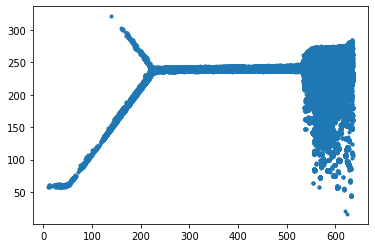

In [170]:
plt.plot(tracking.x, tracking.y,'.')

In [109]:
track = tracking

### filtering tracked data
Now I am filtering only the particles that pass through the channel 

In [110]:
track["l_travelled"] = track.groupby("particle")["x"].transform(lambda x: x - x.max())

In [111]:
track.groupby('particle')['l_travelled'].min().to_frame()

l_travelled
particle             
0           -1.981122
1           -6.560011
2           -6.916053
3          -12.806741
4           -6.765831
...               ...
225         -0.372908
226          0.000000
227          0.000000
228         -0.112561
229          0.000000

[230 rows x 1 columns]

In [112]:
particles_in_channel = (track.groupby('particle')['l_travelled'].min() > -100).to_frame()

In [113]:
particles_in_channel = particles_in_channel.loc[particles_in_channel.l_travelled, :]

# I need to filter out the false row not the true!!!!

In [114]:
particles_in_channel

l_travelled
particle             
0                True
1                True
2                True
3                True
4                True
...               ...
225              True
226              True
227              True
228              True
229              True

[224 rows x 1 columns]

In [115]:
passed = particles_in_channel.index.unique()

In [116]:
passed

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            220, 221, 222, 223, 224, 225, 226, 227, 228, 229],
           dtype='int64', name='particle', length=224)

In [117]:
track = track.drop(index=passed, level = 1)


In [118]:
track

y           x        mass      size       ecc  \
frame particle                                                           
0     11        241.189178  538.697646  244.282261  2.557234  0.184851   
      16        238.755220  368.908929  227.129025  2.522753  0.111040   
      17        239.612429  440.236717  212.700126  2.550998  0.047885   
2     16        238.192497  368.266190  207.077567  2.446844  0.123969   
      11        242.731004  537.432345  227.609599  2.417766  0.193080   
...                    ...         ...         ...       ...       ...   
1030  11        239.975496  274.038023  218.858934  2.429226  0.133798   
1036  11        240.797638  271.988192  204.251922  2.388559  0.148872   
1038  64        241.767900  426.929361  204.706331  2.585956  0.149229   
1044  11        239.432477  270.270505  204.329058  2.514663  0.166652   
1046  11        239.903438  270.019699  204.517802  2.463719  0.163074   

                  signal  raw_mass        ep  l_travelled  
frame particle                                             
0     11        9.787435     894.0  0.022106     0.000000  
      16        8.072111     979.0  0.020287     0.000000  
      17        7.567604     974.0  0.020386     0.000000  
2     16        8.138824     948.0  0.028991    -0.642739  
      11        9.156176     823.0  0.033035    -1.265301  
...                  ...       ...       ...          ...  
1030  11        8.229170     827.0  0.026307  -264.659623  
1036  11        8.565940     763.0  0.019645  -266.709453  
1038  64        7.082583     738.0  0.030831  -125.022801  
1044  11        7.448615     812.0  0.024316  -268.427140  
1046  11        7.978485     825.0  0.027904  -268.677947  

[1291 rows x 9 columns]

In [119]:
track.index.get_level_values('particle').unique()

Int64Index([11, 16, 17, 64, 69, 87], dtype='int64', name='particle')

In [120]:
track.query('particle == 5')

Empty DataFrame
Columns: [y, x, mass, size, ecc, signal, raw_mass, ep, l_travelled]
Index: []

In [121]:
track.query('particle == 2')

Empty DataFrame
Columns: [y, x, mass, size, ecc, signal, raw_mass, ep, l_travelled]
Index: []

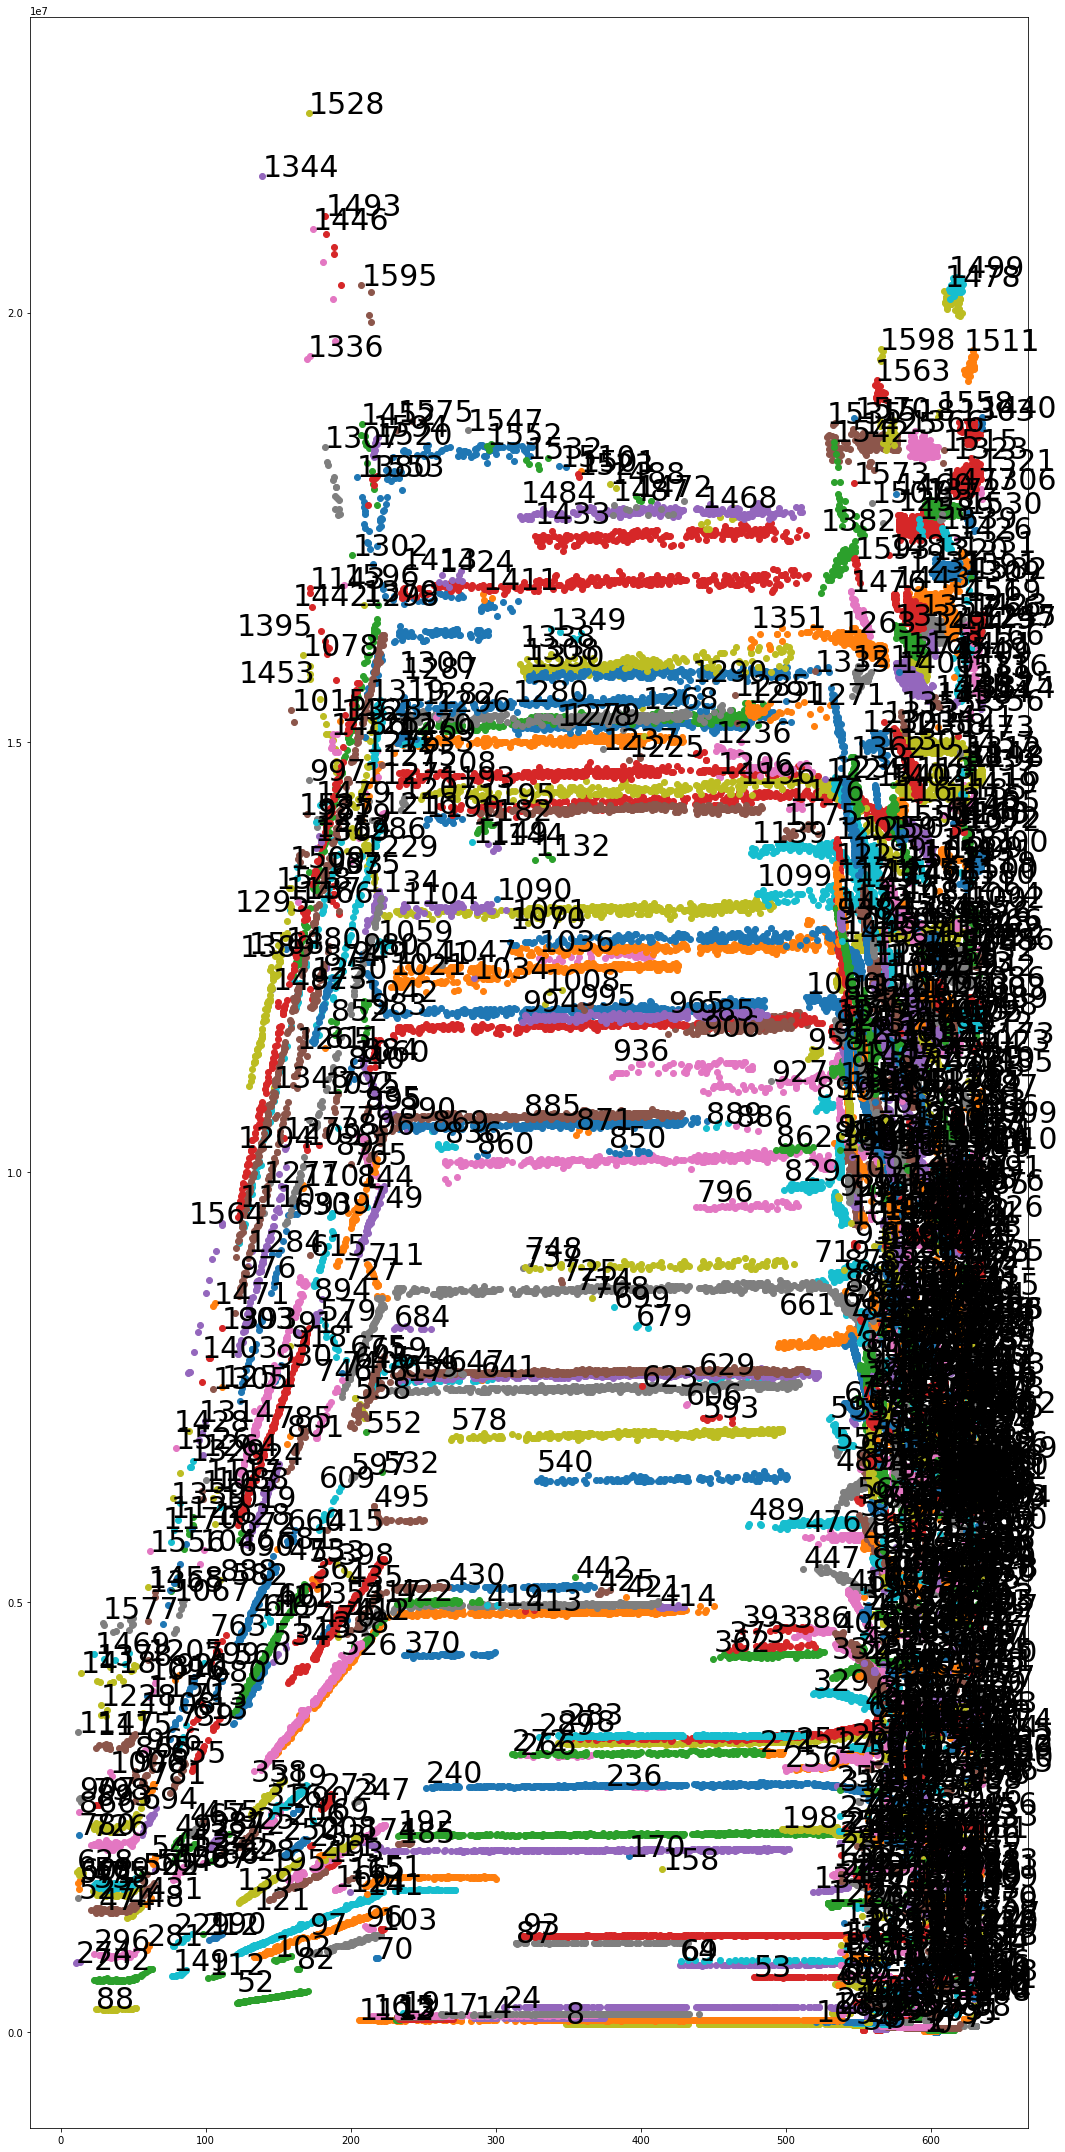

In [171]:
fig, ax = plt.subplots(1,figsize=(15,30))
i = 2
for p,trj_p in tracking.groupby("particle"):
    ax.plot(trj_p.x, trj_p.y*i, "o")
    ax.text(trj_p.x.min(), trj_p.y.max()*i,s = str(p), size = 30)
    i =i + 50 
plt.tight_layout()